In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe
df = pd.DataFrame({'Classifier': ["MLP", "MLP", "MLP",     "LSTM", "LSTM", "LSTM", "MLP", "MLP", "MLP",       "LSTM", "LSTM", "LSTM"],
                   'Approach':  ["Traditional", "Traditional", "Traditional", "Traditional", "Traditional",   "Traditional", "Federated", "Federated", "Federated", "Federated", "Federated", "Federated"],
                   'Accuracy':  [0.752, 0.752, 0.752,      0.732, 0.732, 0.732,      0.725, 0.725, 0.725,      0.734, 0.734, 0.734],
                   'Class':     ["Asleep", "Awake", "Avg", "Asleep", "Awake", "Avg", "Asleep", "Awake", "Avg", "Asleep", "Awake", "Avg"],
                   'Precision': [0.655, 0.771, 0.713,      0.733, 0.709, 0.721,      0.633, 0.734, 0.684,      0.609, 0.755, 0.682],
                   'Recall':    [0.355, 0.920, 0.638,      0.170, 0.970, 0.570,      0.188, 0.953, 0.571,      0.302, 0.918, 0.610],
                   'F1-score':  [0.461, 0.839, 0.650,      0.275, 0.835, 0.555,      0.291, 0.830, 0.560,      0.404, 0.829, 0.616]})


# plot the lines for all columns except 'x'
#plt.plot(df.drop('Classifier', axis=1))

# set the x-axis and y-axis labels
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')

# set the title of the plot
#plt.title('Line Plot of 7 Columns with 13 Rows')

# show the plot
#plt.show()

In [2]:
df

,Classifier,Approach,Accuracy,Class,Precision,Recall,F1-score
0,MLP,Traditional,0.752,Asleep,0.655,0.355,0.461
1,MLP,Traditional,0.752,Awake,0.771,0.920,0.839
2,MLP,Traditional,0.752,Avg,0.713,0.638,0.650
3,LSTM,Traditional,0.732,Asleep,0.733,0.170,0.275
4,LSTM,Traditional,0.732,Awake,0.709,0.970,0.835
5,LSTM,Traditional,0.732,Avg,0.721,0.570,0.555
6,MLP,Federated,0.725,Asleep,0.633,0.188,0.291
7,MLP,Federated,0.725,Awake,0.734,0.953,0.830
8,MLP,Federated,0.725,Avg,0.684,0.571,0.560
9,LSTM,Federated,0.734,Asleep,0.609,0.302,0.404


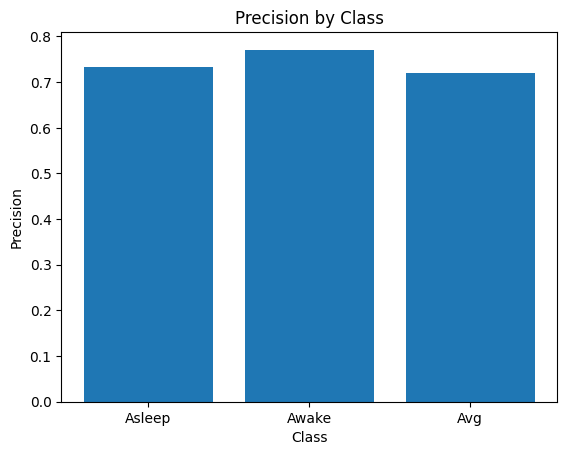

In [3]:
# create a bar plot for the precision column
df

plt.bar(df['Class'], df['Precision'])

# add labels and title
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision by Class')

# show the plot
plt.show()

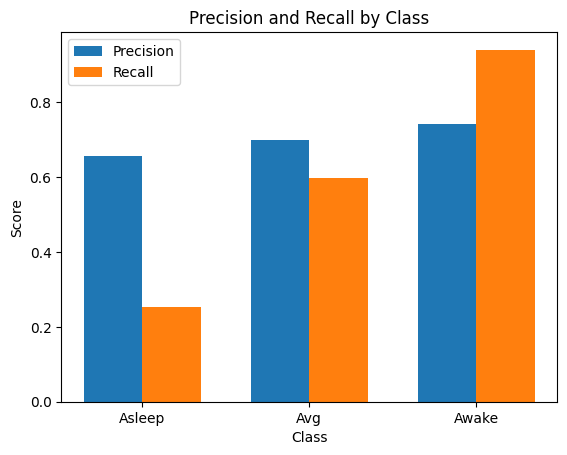

In [4]:
# group the dataframe by class and select the precision and recall columns
df_grouped = df.groupby('Class')[['Precision', 'Recall']].mean()

# get the number of groups and the width of each bar
n_groups = len(df_grouped)
bar_width = 0.35

# create the x-axis labels and positions for the groups
index = np.arange(n_groups)

# create the precision and recall bars for each group
precision_bars = plt.bar(index, df_grouped['Precision'], bar_width, label='Precision')
recall_bars = plt.bar(index + bar_width, df_grouped['Recall'], bar_width, label='Recall')

# add labels and title
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision and Recall by Class')
plt.xticks(index + bar_width / 2, df_grouped.index)
plt.legend()

# show the plot
plt.show()

/tmp/ipykernel_813/685931120.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby(['Approach', 'Class']).mean()[['Precision', 'Recall']]


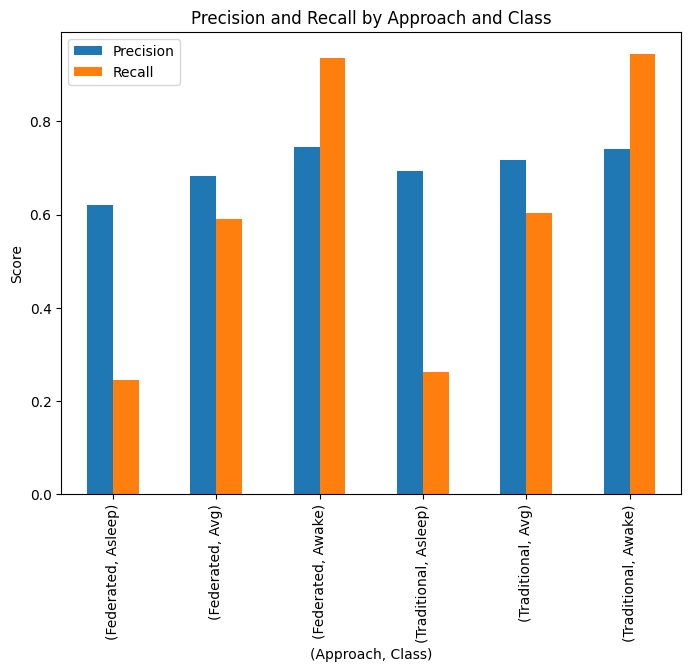

In [5]:
# group the dataframe by approach and class
grouped_df = df.groupby(['Approach', 'Class']).mean()[['Precision', 'Recall']]

# create the plot
ax = grouped_df.plot(kind='bar', figsize=(8, 6))
ax.set_title('Precision and Recall by Approach and Class')
ax.set_xlabel('(Approach, Class)')
ax.set_ylabel('Score')
plt.show()

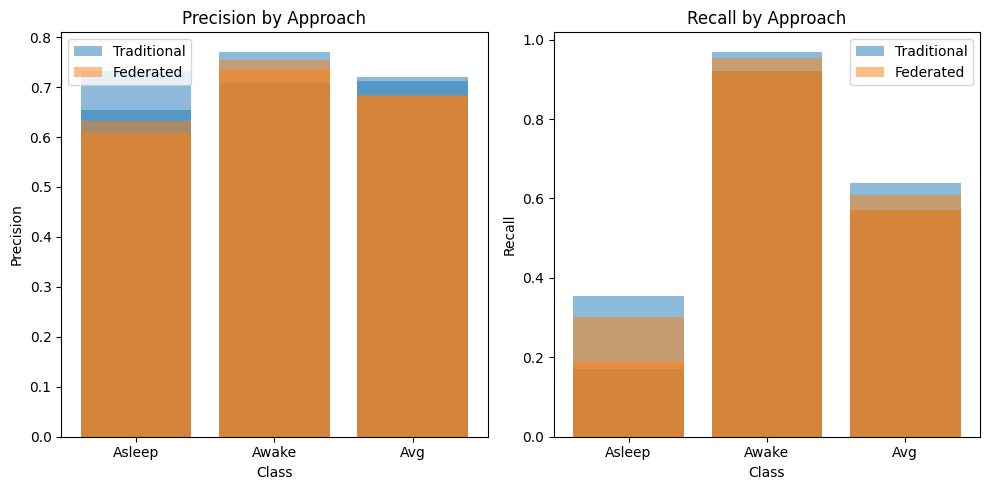

In [6]:
# separate the data by approach
traditional_data = df[df['Approach'] == 'Traditional']
federated_data = df[df['Approach'] == 'Federated']

# create subplots for precision and recall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot precision for traditional and federated approaches
ax1.bar(traditional_data['Class'], traditional_data['Precision'], label='Traditional', alpha=0.5)
ax1.bar(federated_data['Class'], federated_data['Precision'], label='Federated', alpha=0.5)
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision by Approach')
ax1.legend()

# plot recall for traditional and federated approaches
ax2.bar(traditional_data['Class'], traditional_data['Recall'], label='Traditional', alpha=0.5)
ax2.bar(federated_data['Class'], federated_data['Recall'], label='Federated', alpha=0.5)
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall by Approach')
ax2.legend()

# adjust layout and show the plot
fig.tight_layout()
plt.show()

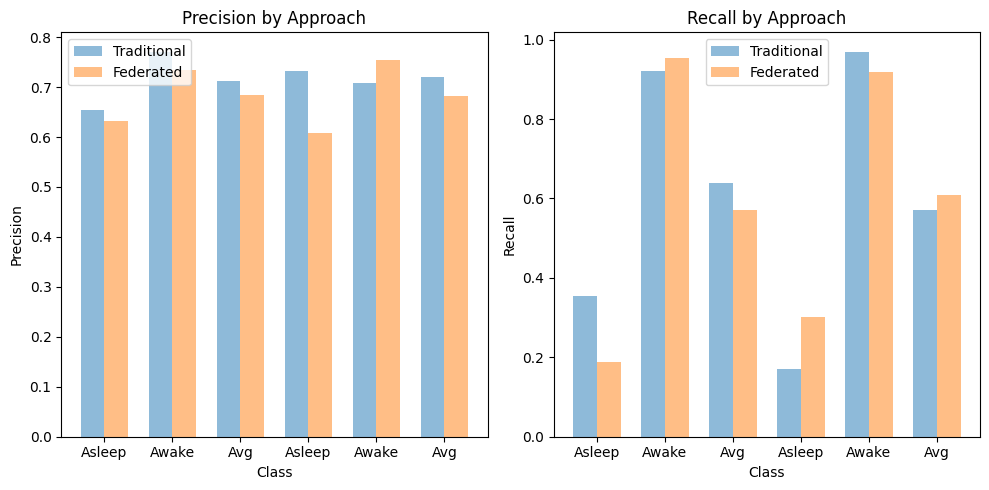

In [7]:
import numpy as np

# separate the data by approach
traditional_data = df[df['Approach'] == 'Traditional']
federated_data = df[df['Approach'] == 'Federated']

# create subplots for precision and recall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot precision for traditional and federated approaches
bar_width = 0.35  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

ax1.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.5)
ax1.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.5)
ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels(traditional_data['Class'])
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision by Approach')
ax1.legend()

# plot recall for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.5)
ax2.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.5)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall by Approach')
ax2.legend()

# adjust layout and show the plot
fig.tight_layout()
plt.show()


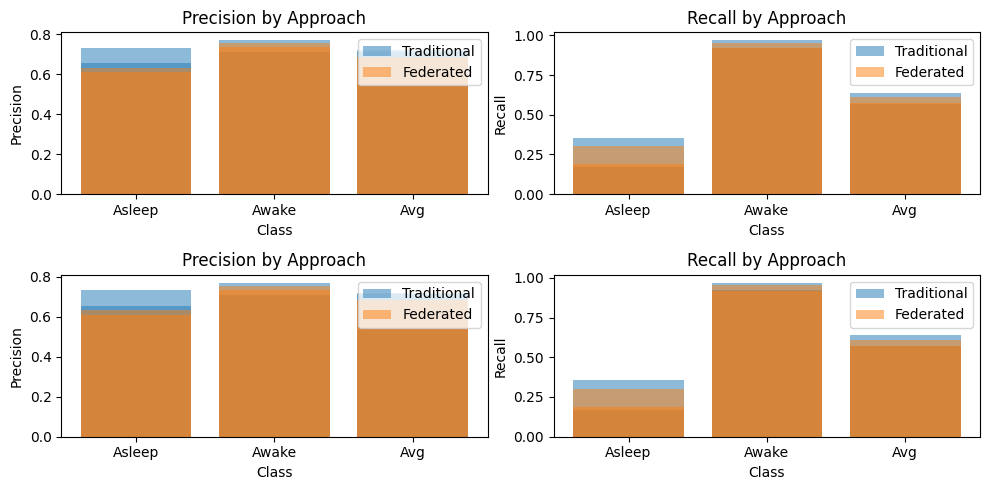

In [8]:
# separate the data by approach
traditional_data = df[df['Approach'] == 'Traditional']
federated_data = df[df['Approach'] == 'Federated']

# create subplots for precision and recall
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

ax1, ax2, ax3, ax4 = axs[0, 0],axs[0, 1],axs[1, 0],axs[1, 1]

# plot precision for traditional and federated approaches
ax1.bar(traditional_data['Class'], traditional_data['Precision'], label='Traditional', alpha=0.5)
ax1.bar(federated_data['Class'], federated_data['Precision'], label='Federated', alpha=0.5)
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision by Approach')
ax1.legend()

# plot recall for traditional and federated approaches
ax2.bar(traditional_data['Class'], traditional_data['Recall'], label='Traditional', alpha=0.5)
ax2.bar(federated_data['Class'], federated_data['Recall'], label='Federated', alpha=0.5)
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall by Approach')
ax2.legend()

# plot precision for traditional and federated approaches
ax3.bar(traditional_data['Class'], traditional_data['Precision'], label='Traditional', alpha=0.5)
ax3.bar(federated_data['Class'], federated_data['Precision'], label='Federated', alpha=0.5)
ax3.set_xlabel('Class')
ax3.set_ylabel('Precision')
ax3.set_title('Precision by Approach')
ax3.legend()

# plot recall for traditional and federated approaches
ax4.bar(traditional_data['Class'], traditional_data['Recall'], label='Traditional', alpha=0.5)
ax4.bar(federated_data['Class'], federated_data['Recall'], label='Federated', alpha=0.5)
ax4.set_xlabel('Class')
ax4.set_ylabel('Recall')
ax4.set_title('Recall by Approach')
ax4.legend()

# adjust layout and show the plot
fig.tight_layout()
plt.show()

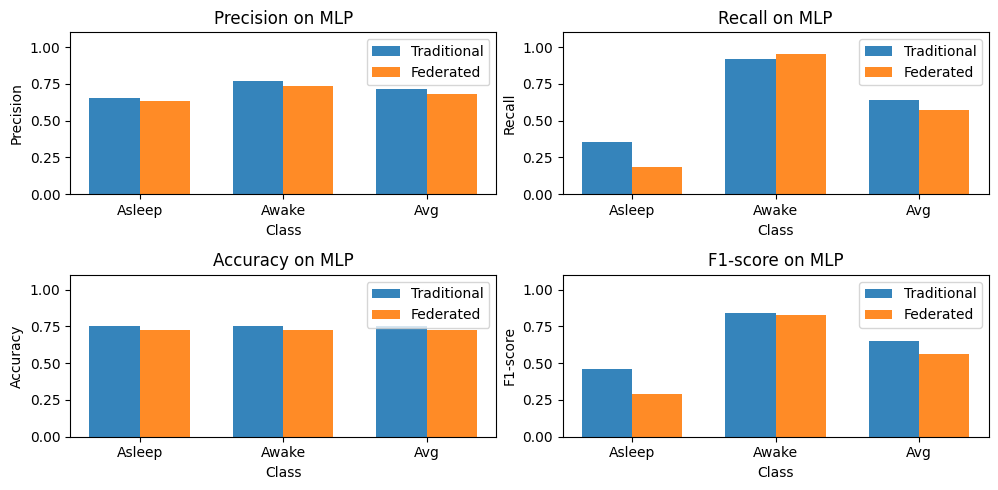

In [9]:
# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'MLP') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'MLP') ]

# create subplots for precision and recall
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

ax1, ax2, ax3, ax4 = axs[0, 0],axs[0, 1],axs[1, 0],axs[1, 1]

# plot precision for traditional and federated approaches
bar_width = 0.35  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9)
ax1.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9)
ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels(traditional_data['Class'])
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision on MLP')
ax1.set_ylim([0, 1.1])
ax1.legend()

# plot recall for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9)
ax2.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall on MLP')
ax2.set_ylim([0, 1.1])
ax2.legend()

# plot precision for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Accuracy'],  width=bar_width, label='Traditional', alpha=0.9)
ax3.bar(x_pos_fed, federated_data['Accuracy'],  width=bar_width, label='Federated', alpha=0.9)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Accuracy')
ax3.set_title('Accuracy on MLP')
ax3.set_ylim([0, 1.1])
ax3.legend()

# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on MLP')
ax4.set_ylim([0, 1.1])
ax4.legend()

# adjust layout and show the plot
fig.tight_layout()
plt.show()

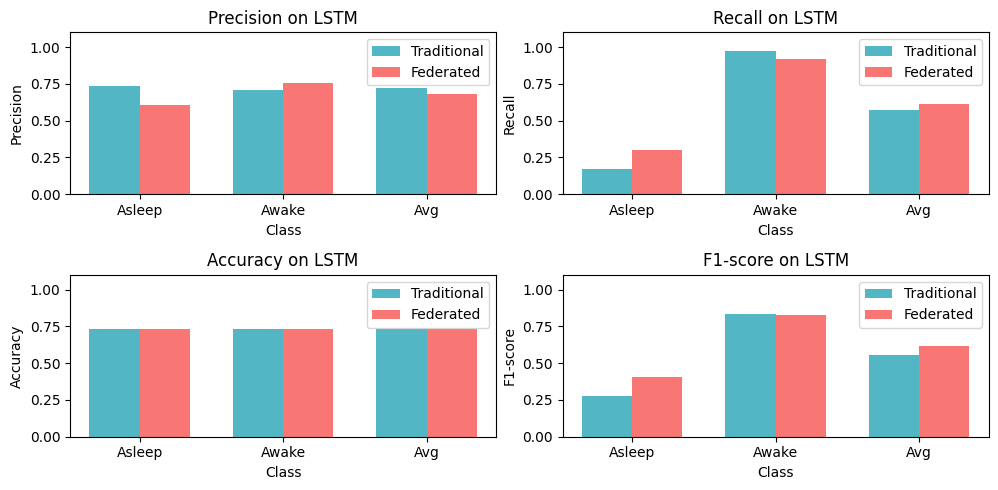

In [10]:
# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'LSTM') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'LSTM') ]

color_trad = ['#3FAEBE']
color_fed  = ['#F86865']

# create subplots for precision and recall
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

ax1, ax2, ax3, ax4 = axs[0, 0],axs[0, 1],axs[1, 0],axs[1, 1]

# plot precision for traditional and federated approaches
bar_width = 0.35  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels(traditional_data['Class'])
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision on LSTM')
ax1.set_ylim([0, 1.1])
ax1.legend()

# plot recall for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall on LSTM')
ax2.set_ylim([0, 1.1])
ax2.legend()

# plot precision for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Accuracy'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Accuracy'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Accuracy')
ax3.set_title('Accuracy on LSTM')
ax3.set_ylim([0, 1.1])
ax3.legend()

# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on LSTM')
ax4.set_ylim([0, 1.1])
ax4.legend()

# adjust layout and show the plot
fig.tight_layout()
plt.show()

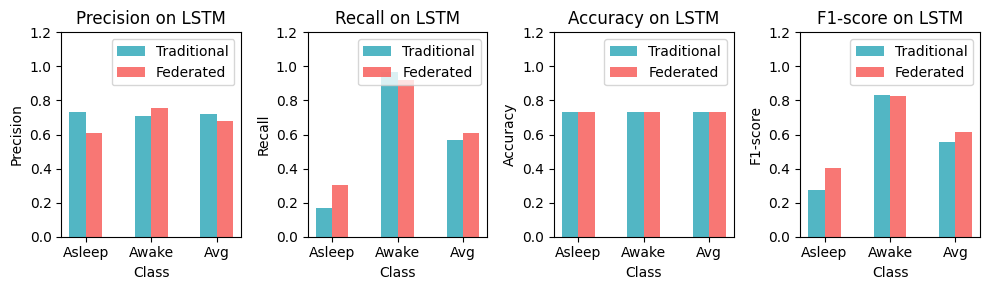

In [11]:
# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'LSTM') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'LSTM') ]

color_trad = ['#3FAEBE']
color_fed  = ['#F86865']

# create subplots for precision and recall
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 3))

#ax1, ax2, ax3, ax4 = axs[0],axs[0, 1],axs[0, 2],axs[1, 3]

# plot precision for traditional and federated approaches
bar_width = 0.25  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels(traditional_data['Class'])
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision on LSTM')
ax1.set_ylim([0, 1.2])
ax1.legend()

# plot recall for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall on LSTM')
ax2.set_ylim([0, 1.2])
ax2.legend()

# plot precision for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Accuracy'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Accuracy'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Accuracy')
ax3.set_title('Accuracy on LSTM')
ax3.set_ylim([0, 1.2])
ax3.legend()

# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on LSTM')
ax4.set_ylim([0, 1.2])
ax4.legend()

# adjust layout and show the plot
fig.tight_layout()
plt.show()

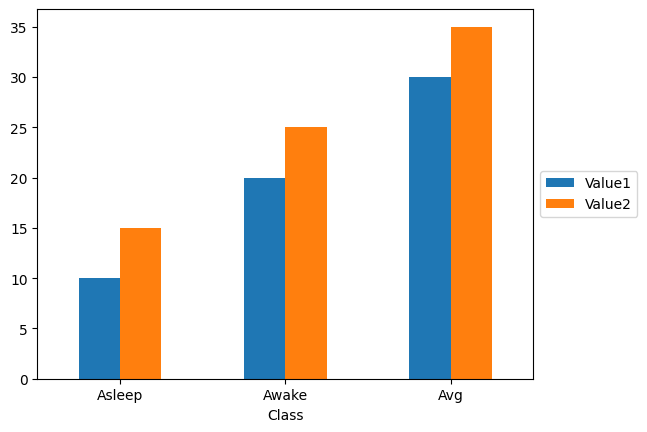

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# criar um DataFrame de exemplo
df2 = pd.DataFrame({'Class': ['Asleep', 'Awake', 'Avg'],
                   'Value1': [10, 20, 30],
                   'Value2': [15, 25, 35]})

# criar um gráfico de barras
ax = df2.plot.bar(x='Class', rot=0)

# adicionar legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# exibir o gráfico
plt.show()

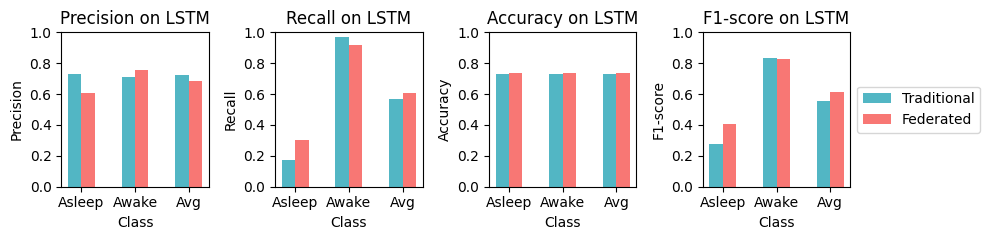

In [13]:
# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'LSTM') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'LSTM') ]

color_trad = ['#3FAEBE']
color_fed  = ['#F86865']

# create subplots for precision and recall
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 2.5))

#ax1, ax2, ax3, ax4 = axs[0],axs[0, 1],axs[0, 2],axs[1, 3]

# plot precision for traditional and federated approaches
bar_width = 0.25  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels(traditional_data['Class'])
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision on LSTM')
ax1.set_ylim([0, 1.0])
ax1.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall on LSTM')
ax2.set_ylim([0, 1.0])
ax2.legend().set_visible(False)

# plot precision for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Accuracy'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Accuracy'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Accuracy')
ax3.set_title('Accuracy on LSTM')
ax3.set_ylim([0, 1.0])
ax3.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on LSTM')
ax4.set_ylim([0, 1.0])
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# adjust layout and show the plot
fig.tight_layout()
plt.show()

/tmp/ipykernel_813/32549970.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.bar(np.array([x_pos_fed[0]]), federated_data['Accuracy'][0:1],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
/tmp/ipykernel_813/32549970.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([''])


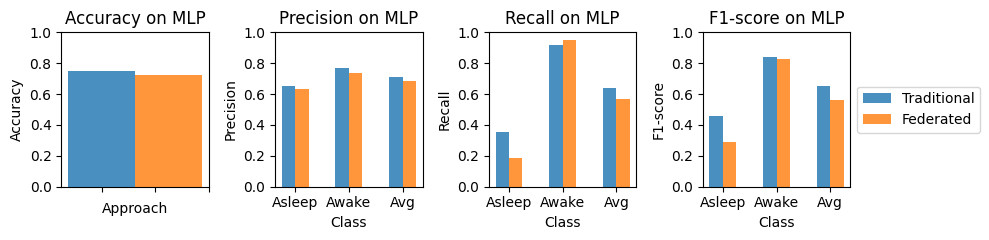

In [14]:
# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'MLP') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'MLP') ]

color_trad = ['#3584BB']
color_fed  = ['#FF8B26']

# create subplots for precision and recall
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 2.5))

#ax1, ax2, ax3, ax4 = axs[0],axs[0, 1],axs[0, 2],axs[1, 3]

# plot precision for traditional and federated approaches
bar_width = 0.25  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(np.array([x_pos_trad[0]]), traditional_data['Accuracy'][0:1],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(np.array([x_pos_fed[0]]), federated_data['Accuracy'][0:1],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
#ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels([''])
ax1.set_xlabel('Approach')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy on MLP')
ax1.set_ylim([0, 1.0])
ax1.legend().set_visible(False)


# plot precision for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Precision')
ax2.set_title('Precision on MLP')
ax2.set_ylim([0, 1.0])
ax2.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Recall')
ax3.set_title('Recall on MLP')
ax3.set_ylim([0, 1.0])
ax3.legend().set_visible(False)



# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on MLP')
ax4.set_ylim([0, 1.0])
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# adjust layout and show the plot
fig.tight_layout()
plt.show()

/tmp/ipykernel_813/194096613.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.bar(np.array([x_pos_trad[0]]), traditional_data['Accuracy'][0:1],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
/tmp/ipykernel_813/194096613.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.bar(np.array([x_pos_fed[0]]), federated_data['Accuracy'][0:1],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
/tmp/ipykernel_813/194096613.py:22: UserWarning: F

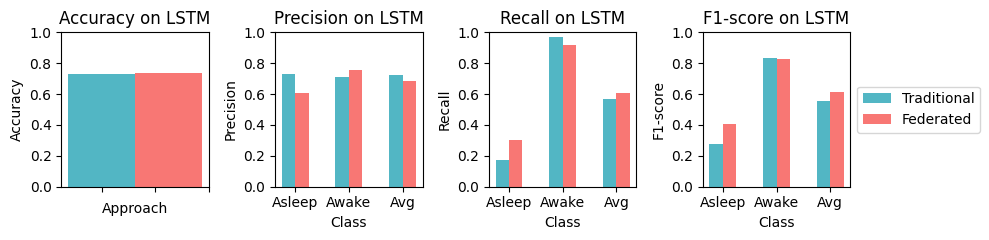

In [15]:
# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'LSTM') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'LSTM') ]

color_trad = ['#3FAEBE']
color_fed  = ['#F86865']

# create subplots for precision and recall
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 2.5))

#ax1, ax2, ax3, ax4 = axs[0],axs[0, 1],axs[0, 2],axs[1, 3]

# plot precision for traditional and federated approaches
bar_width = 0.25  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(np.array([x_pos_trad[0]]), traditional_data['Accuracy'][0:1],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(np.array([x_pos_fed[0]]), federated_data['Accuracy'][0:1],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
#ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels([''])
ax1.set_xlabel('Approach')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy on LSTM')
ax1.set_ylim([0, 1.0])
ax1.legend().set_visible(False)


# plot precision for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Precision')
ax2.set_title('Precision on LSTM')
ax2.set_ylim([0, 1.0])
ax2.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Recall')
ax3.set_title('Recall on LSTM')
ax3.set_ylim([0, 1.0])
ax3.legend().set_visible(False)



# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on LSTM')
ax4.set_ylim([0, 1.0])
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# adjust layout and show the plot
fig.tight_layout()
plt.show()

In [16]:
data_accuracy_fed

NameError: name 'data_accuracy_fed' is not defined

In [ ]:
federated_data['Accuracy'][0:1]

In [ ]:
x_pos_trad


In [ ]:
np.array([x_pos_trad[0]])

In [ ]:
data_accuracy_trad

In [ ]:
[x_pos_trad[0]]

In [17]:
x_pos_trad[0]

0

In [18]:
traditional_data['Class']

3    Asleep
4     Awake
5       Avg
Name: Class, dtype: object

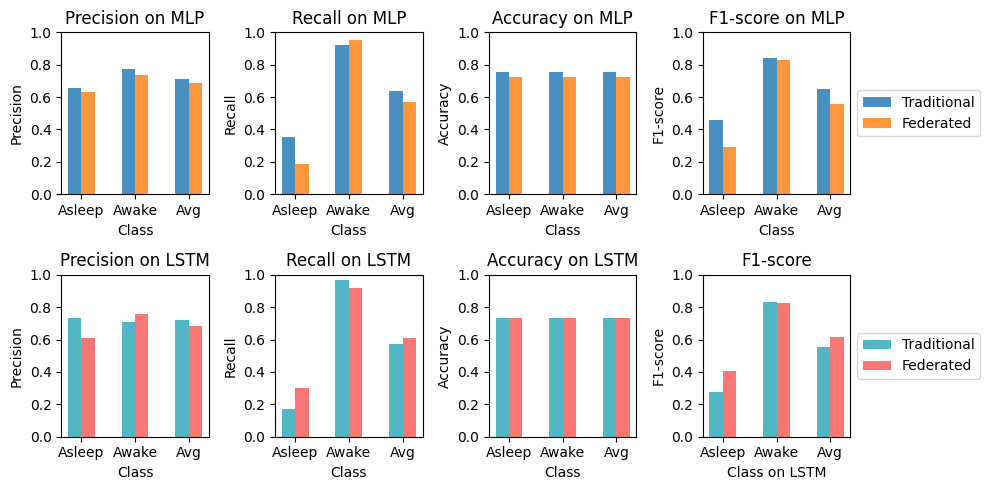

In [19]:
# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'MLP') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'MLP') ]

color_trad = ['#3584BB']
color_fed  = ['#FF8B26']

# create subplots for precision and recall
fig, axs = plt.subplots(2, 4, figsize=(10, 5))

ax1, ax2, ax3, ax4 = axs[0,0],axs[0, 1],axs[0, 2],axs[0, 3]

# plot precision for traditional and federated approaches
bar_width = 0.25  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels(traditional_data['Class'])
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision on MLP')
ax1.set_ylim([0, 1.0])
ax1.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall on MLP')
ax2.set_ylim([0, 1.0])
ax2.legend().set_visible(False)

# plot precision for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Accuracy'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Accuracy'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Accuracy')
ax3.set_title('Accuracy on MLP')
ax3.set_ylim([0, 1.0])
ax3.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on MLP')
ax4.set_ylim([0, 1.0])
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))




# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'LSTM') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'LSTM') ]

color_trad = ['#3FAEBE']
color_fed  = ['#F86865']

# create subplots for precision and recall
#fig, axs = plt.subplots(1, 4, figsize=(10, 2.5))

ax1, ax2, ax3, ax4 = axs[1,0],axs[1, 1],axs[1, 2],axs[1, 3]

# plot precision for traditional and federated approaches
bar_width = 0.25  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels(traditional_data['Class'])
ax1.set_xlabel('Class')
ax1.set_ylabel('Precision')
ax1.set_title('Precision on LSTM')
ax1.set_ylim([0, 1.0])
ax1.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Recall')
ax2.set_title('Recall on LSTM')
ax2.set_ylim([0, 1.0])
ax2.legend().set_visible(False)

# plot precision for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Accuracy'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Accuracy'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Accuracy')
ax3.set_title('Accuracy on LSTM')
ax3.set_ylim([0, 1.0])
ax3.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class on LSTM')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score')
ax4.set_ylim([0, 1.0])
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# adjust layout and show the plot
fig.tight_layout()
plt.show()



# adjust layout and show the plot
fig.tight_layout()
plt.show()

/tmp/ipykernel_813/3153044285.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.bar(np.array([x_pos_fed[0]]), federated_data['Accuracy'][0:1],  width=(bar_width-0.05), label='Federated', alpha=0.9, color=color_fed)
/tmp/ipykernel_813/3153044285.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([''])
/tmp/ipykernel_813/3153044285.py:83: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.bar(np.array([x_pos_trad[0]]), trad

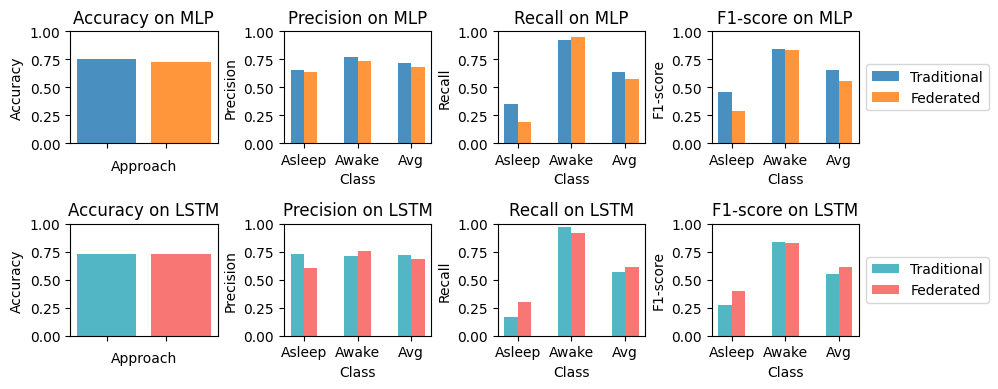

In [20]:
# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'MLP') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'MLP') ]

color_trad = ['#3584BB']
color_fed  = ['#FF8B26']

# create subplots for precision and recall
fig, axs = plt.subplots(2, 4, figsize=(10, 4))

ax1, ax2, ax3, ax4 = axs[0,0],axs[0, 1],axs[0, 2],axs[0, 3]

# plot precision for traditional and federated approaches
bar_width = 0.25  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(np.array([x_pos_trad[0]]), traditional_data['Accuracy'][0:1], width=(bar_width-0.05), label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(np.array([x_pos_fed[0]]), federated_data['Accuracy'][0:1],  width=(bar_width-0.05), label='Federated', alpha=0.9, color=color_fed)
#ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels([''])
ax1.set_xlabel('Approach')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy on MLP')
ax1.set_ylim([0, 1.0])
ax1.legend().set_visible(False)


# plot precision for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Precision')
ax2.set_title('Precision on MLP')
ax2.set_ylim([0, 1.0])
ax2.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Recall')
ax3.set_title('Recall on MLP')
ax3.set_ylim([0, 1.0])
ax3.legend().set_visible(False)



# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on MLP')
ax4.set_ylim([0, 1.0])
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# separate the data by approach
traditional_data = df.loc[(df['Approach'] == 'Traditional') & (df['Classifier'] == 'LSTM') ]
federated_data = df.loc[(df['Approach'] == 'Federated')  & (df['Classifier'] == 'LSTM') ]

color_trad = ['#3FAEBE']
color_fed  = ['#F86865']



ax1, ax2, ax3, ax4 = axs[1,0],axs[1, 1],axs[1, 2],axs[1, 3]

# plot precision for traditional and federated approaches
bar_width = 0.25  # set the width of the bars
x_pos_trad = np.arange(len(traditional_data['Class']))  # create x positions for traditional data
x_pos_fed = x_pos_trad + bar_width  # shift the x positions for federated data

# plot precision for traditional and federated approaches
ax1.bar(np.array([x_pos_trad[0]]), traditional_data['Accuracy'][0:1],  width=(bar_width-0.05), label='Traditional', alpha=0.9, color=color_trad)
ax1.bar(np.array([x_pos_fed[0]]), federated_data['Accuracy'][0:1],  width=(bar_width-0.05), label='Federated', alpha=0.9, color=color_fed)
#ax1.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax1.set_xticklabels([''])
ax1.set_xlabel('Approach')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy on LSTM')
ax1.set_ylim([0, 1.0])
ax1.legend().set_visible(False)

# plot precision for traditional and federated approaches
ax2.bar(x_pos_trad, traditional_data['Precision'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax2.bar(x_pos_fed, federated_data['Precision'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax2.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax2.set_xticklabels(traditional_data['Class'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Precision')
ax2.set_title('Precision on LSTM')
ax2.set_ylim([0, 1.0])
ax2.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax3.bar(x_pos_trad, traditional_data['Recall'], width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax3.bar(x_pos_fed, federated_data['Recall'], width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax3.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax3.set_xticklabels(traditional_data['Class'])
ax3.set_xlabel('Class')
ax3.set_ylabel('Recall')
ax3.set_title('Recall on LSTM')
ax3.set_ylim([0, 1.0])
ax3.legend().set_visible(False)

# plot recall for traditional and federated approaches
ax4.bar(x_pos_trad, traditional_data['F1-score'],  width=bar_width, label='Traditional', alpha=0.9, color=color_trad)
ax4.bar(x_pos_fed, federated_data['F1-score'],  width=bar_width, label='Federated', alpha=0.9, color=color_fed)
ax4.set_xticks(x_pos_trad + bar_width / 2)  # set x ticks to the center of the bars
ax4.set_xticklabels(traditional_data['Class'])
ax4.set_xlabel('Class')
ax4.set_ylabel('F1-score')
ax4.set_title('F1-score on LSTM')
ax4.set_ylim([0, 1.0])
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# adjust layout and show the plot
fig.tight_layout()
plt.show()

# generate
fig.savefig('experiments_fl.png')
fig.savefig('experiments_fl.pdf')